<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582425-1694712726/blob/main/Assignment_3_(Penguin)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3
Shivam Kumar Jha
21BPS1333 - VIT - Chennai

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [38]:
df.shape

(344, 7)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [40]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [41]:
# UNIVARIATE ANALYSIS
import seaborn as sns;

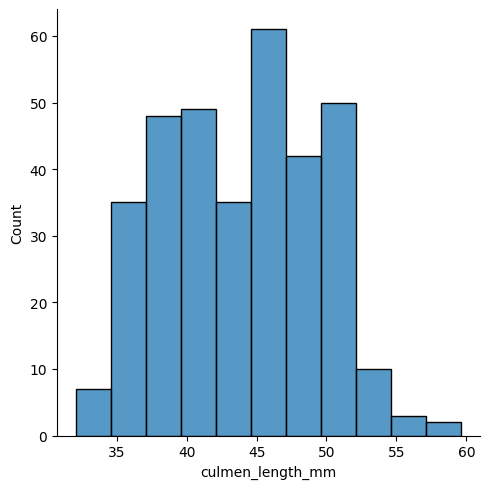

In [42]:
sns.displot(df.culmen_length_mm)

<function matplotlib.pyplot.show(close=None, block=None)>

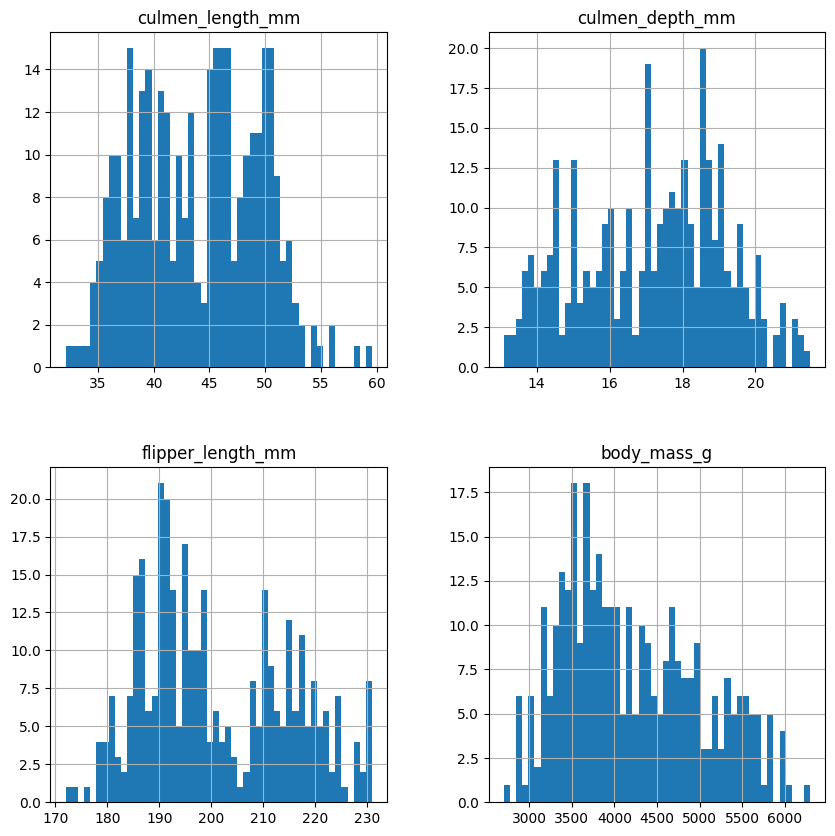

In [43]:
# To visualise all numerical columns at once we can use histplot
# dropping NA values temporarily to plot the graphs.

df_temp = df.dropna()
df_temp.hist(bins = 50 ,figsize = (10,10))
plt.show

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

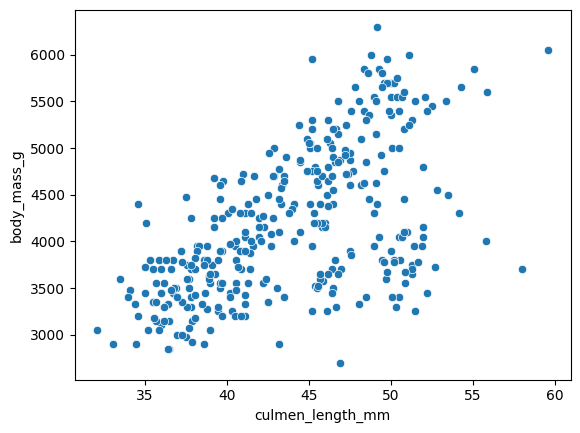

In [44]:
# BIVARIATE
sns.scatterplot(x=df.culmen_length_mm,y =df.body_mass_g)

<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

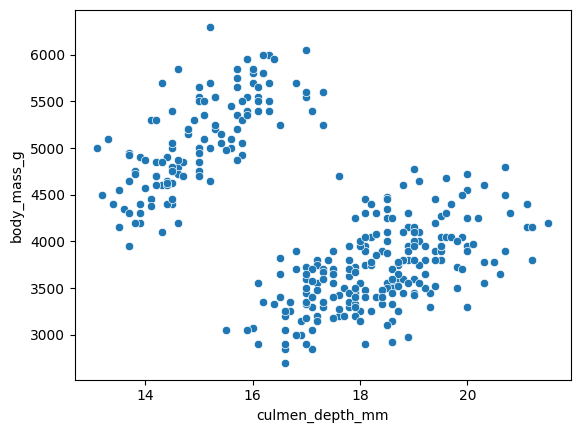

In [45]:
# BIVARIATE
sns.scatterplot(x =df.culmen_depth_mm,y = df.body_mass_g)

In [46]:
# MULTIVARIATE
# Since some columns are object based we need to first encode it

In [47]:
df.mean()

<ipython-input-47-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [48]:
df.median()

<ipython-input-48-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [49]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [50]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [51]:
# so we've got some null values
# let's replace the null values of the neumerical columns with their median
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace = True)
df['culmen_length_mm'].isna().sum()

0

In [58]:
# similarly
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace = True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace = True)


0

In [65]:
# FOR Object column sex we can replace it with mode
df.iloc[:,6:7]=df.fillna(df.iloc[:,6:7].mode())
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

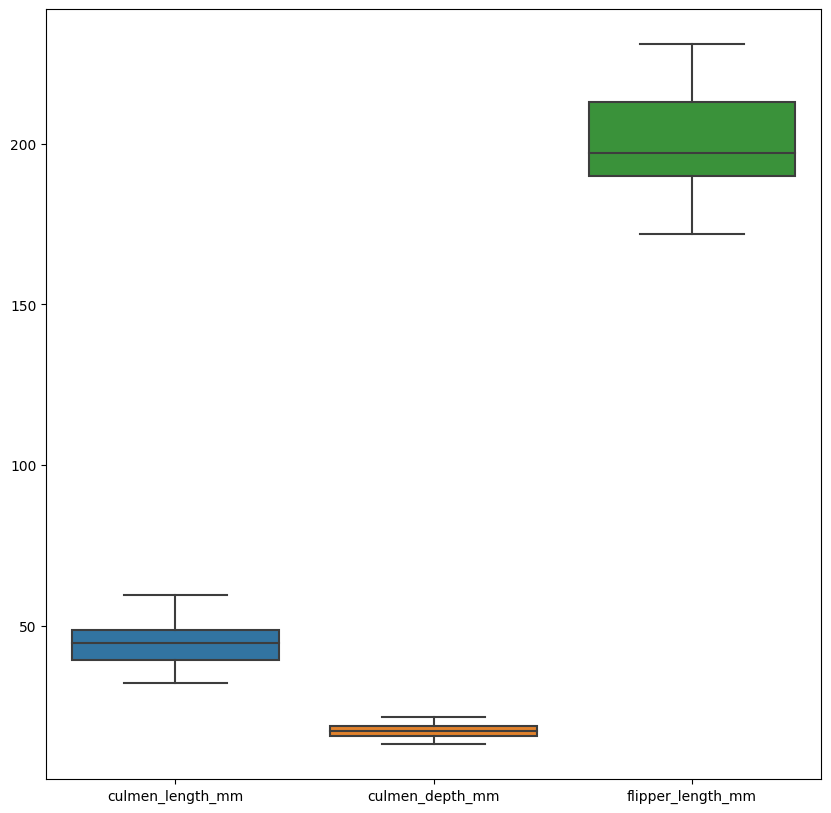

In [71]:
# trying to plot the boxplot for all columns at once
plt.figure(figsize = (10,10))
df_temp2 = df.drop('body_mass_g',axis = 1)
sns.boxplot(data = df_temp2)

# Hence we can clearly say , there are no outliers in these 3 columns

<Axes: >

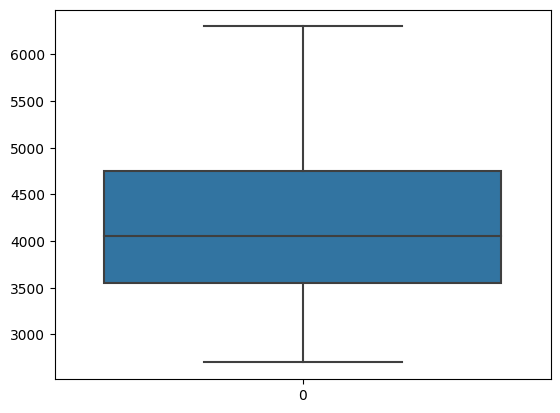

In [72]:
# checking the outliers in the body_mass_g column
sns.boxplot(df.body_mass_g)

# there are no outliers here as well

In [79]:
# Checking the correlation

df.corr().body_mass_g.sort_values(ascending = False)  # Here we can observe the correlation

<ipython-input-79-ae4a52ef3dbe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().body_mass_g.sort_values(ascending = False)


body_mass_g          1.000000
flipper_length_mm    0.871221
culmen_length_mm     0.594925
culmen_depth_mm     -0.471942
Name: body_mass_g, dtype: float64

<ipython-input-81-1f64dab2be8f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

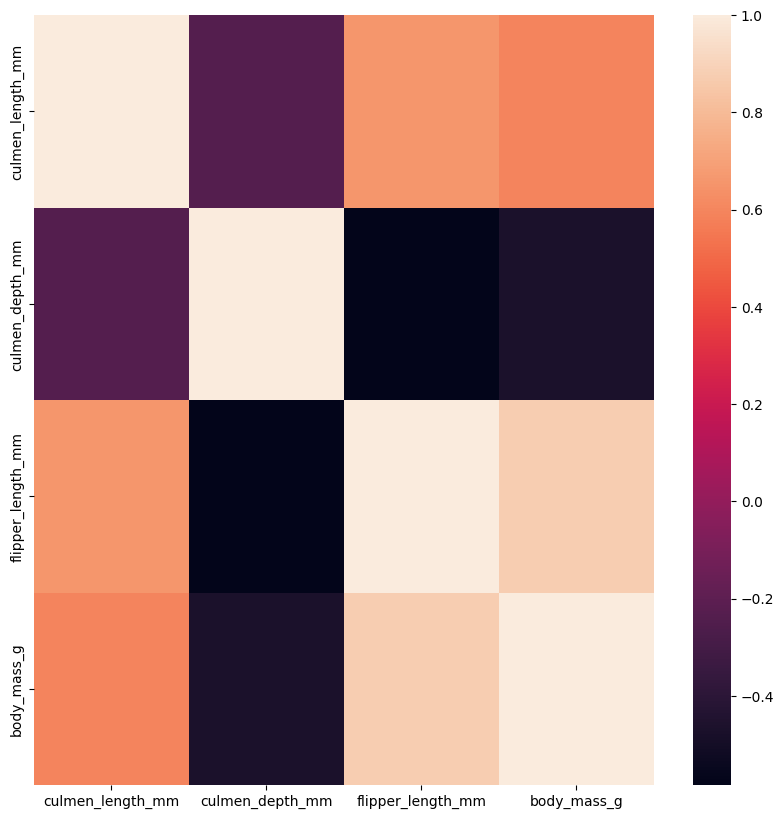

In [81]:
# MULTIVARIATE ANALYSIS
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [83]:
# SINCE THERE ARE 2 CATEGORICAL COLUMNS WE WILL ENCODE THEM USING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [85]:
df['species'] = le.fit_transform(df['species'])
df.species.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [86]:
df['island'] = le.fit_transform(df['island'])
df.island.head()

0    2
1    2
2    2
3    2
4    2
Name: island, dtype: int64

In [89]:
df['sex'] = le.fit_transform(df['sex'])
df.sex.head()

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [90]:
# Split the data into dependent and independent variables.

x = df.drop('body_mass_g', axis = 1)
x.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0,2,39.10,18.7,181.0,0
1,0,2,39.50,17.4,186.0,0
2,0,2,40.30,18.0,195.0,0
3,0,2,44.45,17.3,197.0,0
4,0,2,36.70,19.3,193.0,0


In [92]:
y = df.body_mass_g
y.head()

0    3750.0
1    3800.0
2    3250.0
3    4050.0
4    3450.0
Name: body_mass_g, dtype: float64

In [95]:
# Scaling the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [97]:
x_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
x_scaled.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0.0,1.0,0.254545,0.666667,0.152542,0.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.0
3,0.0,1.0,0.449091,0.500000,0.423729,0.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.0


In [98]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

In [100]:
# checking the shape of training and testing data
x_train.shape

(275, 6)

In [101]:
x_test.shape

(69, 6)

In [102]:
y_train.shape

(275,)

In [103]:
y_test.shape

(69,)